In [1]:
%autosave 0
from __future__ import print_function

Autosave disabled


### RMSD/eRMSD calculation

We here show how to calculate  distances between three-dimensional structures. 
eRMSD can be calculated using the function  
```python
ermsd = bb.ermsd(reference_file,target_file)
```
reference_file and target_file are typically PDB files. eRMSD between reference and all frames in a simulation can be calculated by specifying the trajectory and topology files:  

```python
ermsd = bb.ermsd(reference_file,target_traj_file,topology=topology_file)
```
All trajectory formats accepted by MDTRAJ (e.g. pdb, xtc, trr, dcd, binpos, netcdf, mdcrd, prmtop) can be used.

**Nota Bene**
- eRMSD is a dimensionless number. 
- remove periodic boundary conditions before performing the analysis.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import barnaba
import barnaba as bb

# define trajectory and topology files
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
native="uucg2.pdb"


print("# calculate eRMSD from native")
ermsd = bb.ermsd(native,traj,topology=top)



# calculate eRMSD from native


# Loaded reference uucg2.pdb 
# Loaded target ../test/data/UUCG.xtc 



We plot the eRMSD over time or make an histogram

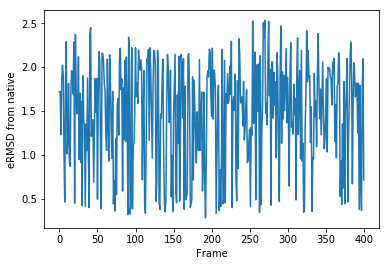

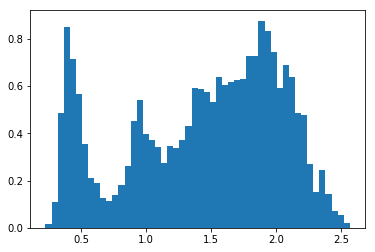

In [4]:
import matplotlib.pyplot as plt
plt.xlabel("Frame")
plt.ylabel("eRMSD from native")
plt.plot(ermsd[::50])
plt.show()

plt.hist(ermsd,normed=True,bins=50)
plt.show()

As a rule of thumb, eRMSD below 0.7-0.8 can be considered *low*, as such the peak around 0.4 eRMSD corresponds to structures that are very similar to the native. We can also calculate the root mean squared deviation (RMSD) after optimal superposition by using 
```python
rmsd = bb.rmsd(reference_file,target_file)
```
or
```python
rmsd = bb.rmsd(reference_file,target_traj_file,topology=topology_file)
```
for trajectories. RMSD is calculated using all heavy atoms. If RMSD is calculated between structures with different sequences, only backbone and sugar heavy atoms are considered for mismatching residues. Values are expressed in nanometers.


# calculate RMSD from native
# found  166 atoms in common


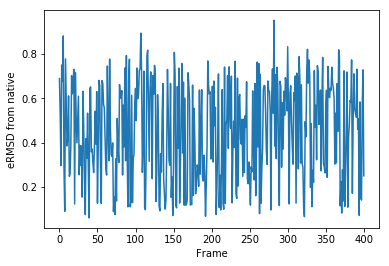

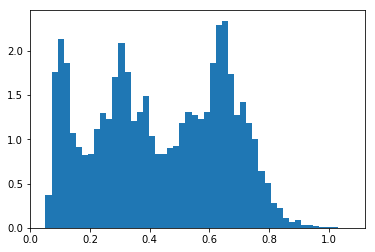

In [5]:
print("# calculate RMSD from native")
rmsd = bb.rmsd(native,traj,topology=top)
plt.xlabel("Frame")
plt.ylabel("eRMSD from native")
plt.plot(rmsd[::50])
plt.show()

plt.hist(rmsd,normed=True,bins=50)
plt.show()


Structures with eRMSD lower than 0.7 are typically very similar to the native.
Note that structures with *low* RMSD (less than 0.4 nm) may be very different from native.

Let's compare RMSD and eRMSD



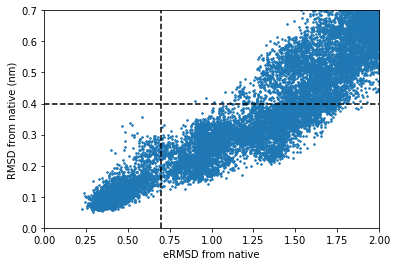

In [6]:

plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
plt.axvline(0.7,ls = "--", c= 'k')
plt.xlim(0,2.0)
plt.ylim(0,0.7)
plt.scatter(ermsd,rmsd,s=2.5)


We can clearly see that the two measures are correlated, but several structures with low RMSD have very large eRMSD.
We pick for example a structure with RMSD from native $\approx$ 0.3 nm, but high eRMSD.


Highest eRMSD for structures with  RMSD ~ 0.3nm
eRMSD:1.652; RMSD: 0.295 nm


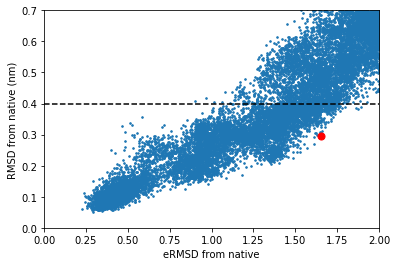

In [7]:

low_rmsd = np.where(rmsd<0.3)
idx_a = np.argsort(ermsd[low_rmsd])[-1]
low_e = low_rmsd[0][idx_a]
print("Highest eRMSD for structures with  RMSD ~ 0.3nm")
print("eRMSD:%5.3f; RMSD: %5.3f nm" % (ermsd[low_e],rmsd[low_e]))


plt.xlabel("eRMSD from native")
plt.ylabel("RMSD from native (nm)")
plt.axhline(0.4,ls = "--", c= 'k')
#plt.axvline(0.7,ls = "--", c= 'k')
plt.xlim(0,2.0)
plt.ylim(0,0.7)
plt.scatter(ermsd,rmsd,s=2.5)

plt.scatter(ermsd[low_e],rmsd[low_e],s=50,c='r')





We can extract a frame from the simulation using the save function from MDTraj. 
In order to align two RNA structures it is possible to pass a string to the rmsd function using the keyword *out*.  

We finally use py3Dmol module to visualize the native and the high-eRMSD structures.

In [9]:
import py3Dmol
import mdtraj as md

# load trajectory
tt = md.load(traj,top=top)

# save low ermsd 
tt[low_e].save("low_ermsd.pdb")

# align to native
rmsd1 = bb.rmsd(native,'low_ermsd.pdb',out='low_ermsd_align.pdb')

# show
pdb_e = open('low_ermsd_align.pdb','r').read()
pdb_n = open(native,'r').read()

p = py3Dmol.view(width=900,height=600,viewergrid=(1,2))
p.addModel(pdb_n,'pdb',viewer=(0,0))
p.addModel(pdb_e,'pdb',viewer=(0,1))

p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

# found  166 atoms in common


On the left the native UUCG and on the right the highest eRMSD among all structures with RMSD from native $\approx$ 0.3nm.
The two structures are similar in the closing base-pairs, but completely different in the tetraloop region.